## Colabs / Apuntes

Join de dataset -> https://colab.research.google.com/drive/13OxWMcG29nu2azQaE6jFy_CA8rKXM_3d?usp=sharing

correlación -> 
https://colab.research.google.com/drive/14LvYgnmh95C5u23fl1bW_Ct-a5_JGOy1?authuser=5#scrollTo=ec6UrovRcDv4

pairPlot ->
https://colab.research.google.com/drive/13h-FRA3S9LQ9oGXbHrlEexo8OonQb36u?authuser=5#scrollTo=KA97UsQI8w-p

confusión ->
https://colab.research.google.com/drive/1YfUwN5NCEooPOWuiwIJnKSWoh8eoTK8v?authuser=5#scrollTo=U3NndF5kc9X5

https://colab.research.google.com/drive/1f8cKxSVCDcTqYWqsaJj4Hu5FmJFgH-en?authuser=5#scrollTo=v87bfMnlOxqj

naiveBayes ->
https://colab.research.google.com/drive/1YB-zjVqfNqH23xTbGHZbnr--3aCSj6kE?authuser=5#scrollTo=wpd-FeBm3CKo

crossvalidation -> https://colab.research.google.com/drive/1YB-zjVqfNqH23xTbGHZbnr--3aCSj6kE#scrollTo=wpd-FeBm3CKo

Knn Clasificación -> https://colab.research.google.com/drive/13OxWMcG29nu2azQaE6jFy_CA8rKXM_3d?authuser=5

Knn Regresión -> https://colab.research.google.com/drive/1PUPhjokFgDhXj4BtNVRwr_BJd607Z2Ln?authuser=5

Knn evaluación -> https://colab.research.google.com/drive/1y1I_7eWWw-vPRyX7eXZBRHE_t3Qwo79H?authuser=5#scrollTo=ATbs-xC-SbvB

--- Árboles de decisión ---

  -> https://colab.research.google.com/drive/17HzYOY64LFvOAd4aiFQZOE2aWIakPw76?usp=sharing

  -> https://colab.research.google.com/drive/1_KeXchLiusJCfss2I_N4mSAtqtoEQLfK?usp=sharing

  grid / random -> https://colab.research.google.com/drive/1gJa6BcmV5UAwOk1RZ5BX94v5kQqWevKF?usp=sharing

# 1. Problema y DataSet

El objeto de esta actividad es realizar una predicción del número de alquileres realizados en las estaciones de bicicletas gestionadas por SAGULPA en un día del año. Para lo cual utilizaremos los datos
abiertos publicados en su web.


---

DadaSet --> https://www.sagulpa.com/datos-abiertos

Datos abiertos del tiempo --> https://www.tutiempo.net/registros/gclp/1-diciembre-2019.html

## Preparación - Imports de librerias


In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files
from google.colab import drive
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# NaiveBayes
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
# Escalamiento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler    # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector
# Knn
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor   #Regresión
from sklearn.neighbors import KNeighborsClassifier  #Clasificación
from sklearn.model_selection import cross_val_score #Valor máx de Cross Validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Exportar/importar el modelo
import sklearn.externals 
import joblib
import pickle #Otra librería para exportar
# Métricas de error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# Búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Imports Árboles

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor   #para clasificación

# 2. Importación del dataSet y descarga de datos

1. Obtención de datos
  * Alquiler de bicicletas han sido obtenidos de la web de [Sagulpa](https://www.sagulpa.com/datos-abiertos).
  * Datos meteorológicos, de la web [TuTiempo.net](
https://www.tutiempo.net/registros/gclp/1-diciembre-2019.html), haciendo uso de la extensión [WebScraper](https://www.webscraper.io/) de Chrome.
    * Con el siguiente JSON
    ```
{"_id":"tiempo","startUrl":["https://www.tutiempo.net/registros/gclp/1-enero-2019.html"],"selectors":[{"id":"Día","parentSelectors":["pagination"],"type":"SelectorText","selector":"th.ndia","multiple":false,"regex":""},{"id":"table","parentSelectors":["pagination"],"type":"SelectorTable","multiple":true,"selector":".last24 table","tableDataRowSelector":"tr:nth-of-type(n+3)","tableHeaderRowSelector":"tr:nth-of-type(2)","columns":[{"extract":true,"header":"Hora","name":"Hora"},{"extract":true,"header":"Condiciones meteorológicasCM","name":"Condiciones meteorológicas"},{"extract":true,"header":"Tem.","name":"Temperatura"},{"extract":true,"header":"Viento","name":"Viento"},{"extract":true,"header":"Hum.","name":"Humedad"},{"extract":true,"header":"Presión","name":"Presión"}]},{"id":"pagination","parentSelectors":["_root","pagination"],"paginationType":"auto","selector":"a.prevnextreg:nth-of-type(2)","type":"SelectorPagination"}]}
```




2. Posteriormente han sido tratados y unificados desde [Power Bi](https://powerbi.microsoft.com/es-es/desktop/)

3. En este punto descargaremos los datos unificados de alquiler de bicicletas y climatología, desde mi repositorio en [GitHub](https://github.com/Ruben-Armas/AI_Models_and_Data_Processing/tree/main/DataSets/Sagulpa).

## 2022

In [ ]:
url = 'https://github.com/Ruben-Armas/AI_Models_and_Data_Processing/blob/main/DataSets/Sagulpa/S%C3%ADticleta/2022.csv?raw=true'
df_2022 = pd.read_csv(url)

In [ ]:
df_2022.head()

,Año,month,day,hour,dayWeek,rentalPlace,weatherConditions,temperature,humidity,wind,pressure,rentalAmount
0,2022,1,1,6,6,C.C. El Muelle,Despejado,17.75,0.57,6.75,1021.25,1
1,2022,1,1,6,6,Plaza de España,Despejado,17.75,0.57,6.75,1021.25,1
2,2022,1,1,6,6,Plaza del Pilar,Despejado,17.75,0.57,6.75,1021.25,1
3,2022,1,1,7,6,Ayuntamiento,Despejado,18.50,0.51,8.75,1021.75,1
4,2022,1,1,7,6,C.C. La Minilla,Despejado,18.50,0.51,8.75,1021.75,1


In [ ]:
df_2022.shape

(140799, 12)

## 2022 Febrero

Creamos los DataFrame (separando por ' , ')

El separador por defecto es ' , ' --> si hiciera falta separar por otra cosa, hay que añadir (, sep='separador') en el pd.read()

In [ ]:
url = 'https://github.com/Ruben-Armas/AI_Models_and_Data_Processing/blob/main/DataSets/Sagulpa/S%C3%ADticleta/Meses/2022/02.csv?raw=true'
#https://raw.githubusercontent.com/Ruben-Armas/AI_Models_and_Data_Processing/main/DataSets/Sagulpa/S%C3%ADticleta/Meses/2022/02.csv
df_2022_02 = pd.read_csv(url)

In [ ]:
df_2022_02.head()

,Año,month,day,hour,dayWeek,rentalPlace,weatherConditions,temperature,humidity,wind,pressure,rentalAmount
0,2022,2,1,6,2,Cabildo de Gran Canaria,Despejado,21.0,0.33,7.5,1019.0,1
1,2022,2,1,6,2,Las Canteras - Luis Morote,Despejado,21.0,0.33,7.5,1019.0,1
2,2022,2,1,6,2,Mercado Central,Despejado,21.0,0.33,7.5,1019.0,1
3,2022,2,1,6,2,Oficina Sítycleta (elect.),Despejado,21.0,0.33,7.5,1019.0,1
4,2022,2,1,6,2,Parque del Estadio Insular,Despejado,21.0,0.33,7.5,1019.0,1


In [ ]:
df_2022_02.shape

(11975, 12)

# 3. Ajuste y Construcción del DataFrame

## Renombrar Día a Inglés

In [ ]:
df_2022 = df_2022.rename(columns={'Año': 'year'})
df_2022_02 = df_2022_02.rename(columns={'Año': 'year'})

## Columna temporal date

In [ ]:
df_2022['date'] = pd.to_datetime(df_2022[['year', 'month', 'day']])
df_2022_02['date'] = pd.to_datetime(df_2022_02[['year', 'month', 'day']])

## Añado Día Laboral

La librería **workalendar** tiene métodos para saber los días laborales y festivos (la documentación es muy **poco intuitiva**)

Links
* https://workalendar.github.io/workalendar/
* https://github.com/workalendar/workalendar

### Instalar / imports

In [ ]:
pip install workalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from workalendar.europe import Spain
from workalendar.europe.spain import CanaryIslands
# Crear el diccionario de días festivos para Canarias
#cal = Spain()
cal = CanaryIslands()

### Función para poner 0/1 si hay o no festivo en el dataframe

In [ ]:
def is_schoolDay(date):
    if cal.is_working_day(date):
        return 1
    else:
        return 0

### Añade la columna al dataFrame

In [ ]:
df_2022['workingDay'] = df_2022['date'].apply(is_schoolDay)
df_2022_02['workingDay'] = df_2022_02['date'].apply(is_schoolDay)

## Borra la columna temporal date

In [ ]:
df_2022 = df_2022.drop('date', axis=1)
df_2022_02 = df_2022_02.drop('date', axis=1)

## Eliminación de la columna 'Año' y 'month'

Esta columna no es necesaria, ya que vamos a entrenar con los datos de un mismo año

In [ ]:
df_2022 = df_2022.drop(['year', 'month'], axis=1)
df_2022_02 = df_2022_02.drop(['year', 'month'], axis=1)

## Eliminación de las columnas extra del clima

Eliminamos también los datos extra del clima, quedándonos únicamente con 'weatherConditions'

Esto lo hago porque todas las variables del clima están correlacionadas, y cuantas menos columnas tengamos mejor (debido a la Maldición de la Dimensionalidad). Ya que a más columnas, las filas deberían aumentar exponencialmente.

In [ ]:
df_2022 = df_2022.drop(['temperature', 'humidity', 'wind', 'pressure'], axis=1)
df_2022_02 = df_2022_02.drop(['temperature', 'humidity', 'wind', 'pressure'], axis=1)

## Eliminación de "clases" que se salen de rango

En este caso eliminaré las filas en las que 'rentalAmount' sea mayor a 11, ya que la cantidad de registros con estos datos son mínimos y prácticamente despreciables 

### Cantidad de cada clase, antes del ajuste

In [ ]:
counts_2022 = df_2022['rentalAmount'].value_counts()
counts_2022_02 = df_2022_02['rentalAmount'].value_counts()
print(f'Todo 2022: {counts_2022}')
print(f'Febrero 2022: {counts_2022_02}')

Todo 2022: 1     66145
2     35010
3     19184
4     10240
5      5208
6      2614
7      1252
8       598
9       290
10      142
11       56
12       27
13       22
14        6
15        3
17        2
Name: rentalAmount, dtype: int64
Febrero 2022: 1     4865
2     2920
3     1751
4     1096
5      608
6      334
7      191
8       97
9       56
10      34
11      13
12       4
13       4
15       1
14       1
Name: rentalAmount, dtype: int64


### Eliminación de clases fuera de rango

In [ ]:
df_2022 = df_2022[df_2022['rentalAmount'] <= 11]
df_2022_02 = df_2022_02[df_2022_02['rentalAmount'] <= 11]

### Cantidad de cada clases, después del ajuste

In [ ]:
counts_2022 = df_2022['rentalAmount'].value_counts()
counts_2022_02 = df_2022_02['rentalAmount'].value_counts()
print(f'Todo 2022: {counts_2022}')
print(f'Febrero 2022: {counts_2022_02}')

Todo 2022: 1     66145
2     35010
3     19184
4     10240
5      5208
6      2614
7      1252
8       598
9       290
10      142
11       56
Name: rentalAmount, dtype: int64
Febrero 2022: 1     4865
2     2920
3     1751
4     1096
5      608
6      334
7      191
8       97
9       56
10      34
11      13
Name: rentalAmount, dtype: int64


## DataFrames resultantes

In [ ]:
df_2022

,day,hour,dayWeek,rentalPlace,weatherConditions,rentalAmount,workingDay
0,1,6,6,C.C. El Muelle,Despejado,1,0
1,1,6,6,Plaza de España,Despejado,1,0
2,1,6,6,Plaza del Pilar,Despejado,1,0
3,1,7,6,Ayuntamiento,Despejado,1,0
4,1,7,6,C.C. La Minilla,Despejado,1,0
...,...,...,...,...,...,...,...
140794,31,22,6,Parque del Estadio Insular,Despejado,1,0
140795,31,22,6,Plaza del Pilar,Despejado,2,0
140796,31,22,6,Plaza O'Shanahan,Despejado,6,0
140797,31,22,6,San Telmo,Despejado,2,0


In [ ]:
df_2022_02

,day,hour,dayWeek,rentalPlace,weatherConditions,rentalAmount,workingDay
0,1,6,2,Cabildo de Gran Canaria,Despejado,1,1
1,1,6,2,Las Canteras - Luis Morote,Despejado,1,1
2,1,6,2,Mercado Central,Despejado,1,1
3,1,6,2,Oficina Sítycleta (elect.),Despejado,1,1
4,1,6,2,Parque del Estadio Insular,Despejado,1,1
...,...,...,...,...,...,...,...
11970,28,22,1,Plaza del Pilar,Mayormente cubierto,1,1
11971,28,22,1,Plaza San Agustín,Mayormente cubierto,4,1
11972,28,22,1,Plazoleta de Farray,Mayormente cubierto,1,1
11973,28,22,1,San Cristóbal,Mayormente cubierto,1,1


# 4. Ajuste de datos para el Entrenamiento

## Leyenda

weatherConditions = {
    'Cielo cubierto': 0,
    'Despejado': 1,
    'Llovizna': 2,
    'Lluvia': 3,
    'Lluvia ligera': 4,
    'Mayormente cubierto': 5,
    'Neblina': 6,
    'Nubes dispersas': 7,
    'Parcialmente cubierto': 8
}

rentalPlace = {
	'Aparcamiento Sanapú': 0,
	'Autoridad portuaria': 1,
	'Ayuntamiento': 2,
	'Barranquillo Don Zoilo': 3,
	'Base Naval': 4,
	'Bicis para reparar': 5,
	'C.C. El Muelle': 6,
	'C.C. La Ballena (elect.)': 7,
	'C.C. La Minilla': 8,
	'Cabildo de Gran Canaria': 9,
	'Canódromo': 10,
	'Canódromo (electric)': 11,
	'Casillo la Luz': 12,
	'Castillo de Mata (elect.)': 13,
	'Castillo de la Luz': 14,
	'Castillo la Luz': 15,
	'Churruca': 16,
	'Ciudad Deportiva': 17,
	'Ciudad de la Justicia': 18,
	'Desconocido': 19,
	'El Sebadal (elec.)': 20,
	'Gabinete Literario': 21,
	'Gestohlen': 22,
	'Hoya de la Plata': 23,
	'IES Mesa y López': 24,
	'Intermodal El Rincón': 25,
	'Las Canteras - Luis Morote': 26,
	'León y Castillo': 27,
	'Mercado Central': 28,
	'Muelle Deportivo': 29,
	'Obelisco': 30,
	'Oficina Sítycleta (elect.)': 31,
	'Oficina de la Sitycleta': 32,
	'Parque Santa Catalina': 33,
	'Parque del Estadio Insular': 34,
	'Paseo de Chil - Av. Escaleritas': 35,
	'Piscina Julio Navarro': 36,
	'Plaza Manuel Becerra': 37,
	'Plaza Manuel Becerra (elect.)': 38,
	"Plaza O'Shanahan": 39,
	'Plaza San Agustín': 40,
	'Plaza de América': 41,
	'Plaza de España': 42,
	'Plaza de España (elect.)': 43,
	'Plaza de la feria': 44,
	'Plaza del Pilar': 45,
	'Plazoleta de Farray': 46,
	'San Bernardo': 47,
	'San Cristóbal': 48,
	'San Telmo': 49,
	'Teatro Pérez Galdós': 50,
	'Torre Las Palmas': 51,
	'Torre Woermann': 52,
	'Vega de San José': 53,
	'Vermisst': 54,
	'Villa de Zarauz': 55
}

## Preparación y visualización

In [ ]:
df_2022_02.dtypes

day                   int64
hour                  int64
dayWeek               int64
rentalPlace          object
weatherConditions    object
rentalAmount          int64
workingDay            int64
dtype: object

## Transformación de categorical a numerical

In [ ]:
#Identifico cuáles son los valores diferentes en "rentalPlace" y "weatherConditions"
rentalPlace_2022 = df_2022["rentalPlace"].unique()
weatherConditions_2022 = df_2022["weatherConditions"].unique()
print(f"2022 -- {len(rentalPlace_2022)} estaciones - {len(weatherConditions_2022)} clima")

rentalPlace_2022_02 = df_2022_02["rentalPlace"].unique()
weatherConditions_2022_02 = df_2022_02["weatherConditions"].unique()
print(f"Febrero 2022 -- {len(rentalPlace_2022_02)} estaciones - {len(weatherConditions_2022_02)} clima")

#print(f"Clima 2022 -> {weatherConditions_2022}")
#print(f"Clima 2019 -> {weatherConditions_2022_02}")

2022 -- 56 estaciones - 9 clima
Febrero 2022 -- 52 estaciones - 7 clima


In [ ]:
# Recopilo todos los weatherConditions únicos
unique_weatherConditions = set(weatherConditions_2022) | set(weatherConditions_2022_02)
# Ordenados por orden alfabético
sorted_unique_weatherConditions = sorted(unique_weatherConditions)
# Creo el diccionario con sus correspondientes posiciones
weatherConditions_dict = {place: i for i, place in enumerate(sorted_unique_weatherConditions)}
print(weatherConditions_dict)

{'Cielo cubierto': 0, 'Despejado': 1, 'Llovizna': 2, 'Lluvia': 3, 'Lluvia ligera': 4, 'Mayormente cubierto': 5, 'Neblina': 6, 'Nubes dispersas': 7, 'Parcialmente cubierto': 8}


In [ ]:
# Recopilo todos los rentalPlace únicos
unique_rentalPlace = set(rentalPlace_2022) | set(rentalPlace_2022_02)
# Ordenados por orden alfabético
sorted_unique_rentalPlace = sorted(unique_rentalPlace)
# Creo el diccionario con sus correspondientes posiciones
rentalPlace_dict = {place: i for i, place in enumerate(sorted_unique_rentalPlace)}
print(rentalPlace_dict)

{'Aparcamiento Sanapú': 0, 'Autoridad portuaria': 1, 'Ayuntamiento': 2, 'Barranquillo Don Zoilo': 3, 'Base Naval': 4, 'Bicis para reparar': 5, 'C.C. El Muelle': 6, 'C.C. La Ballena (elect.)': 7, 'C.C. La Minilla': 8, 'Cabildo de Gran Canaria': 9, 'Canódromo': 10, 'Canódromo (electric)': 11, 'Casillo la Luz': 12, 'Castillo de Mata (elect.)': 13, 'Castillo de la Luz': 14, 'Castillo la Luz': 15, 'Churruca': 16, 'Ciudad Deportiva': 17, 'Ciudad de la Justicia': 18, 'Desconocido': 19, 'El Sebadal (elec.)': 20, 'Gabinete Literario': 21, 'Gestohlen': 22, 'Hoya de la Plata': 23, 'IES Mesa y López': 24, 'Intermodal El Rincón': 25, 'Las Canteras - Luis Morote': 26, 'León y Castillo': 27, 'Mercado Central': 28, 'Muelle Deportivo': 29, 'Obelisco': 30, 'Oficina Sítycleta (elect.)': 31, 'Oficina de la Sitycleta': 32, 'Parque Santa Catalina': 33, 'Parque del Estadio Insular': 34, 'Paseo de Chil - Av. Escaleritas': 35, 'Piscina Julio Navarro': 36, 'Plaza Manuel Becerra': 37, 'Plaza Manuel Becerra (elec

In [ ]:
# Renombra los datos de la columna 'rentalPlace' y 'weatherConditions' utilizando el diccionario
df_2022["rentalPlace"] = df_2022["rentalPlace"].replace(rentalPlace_dict)
df_2022["weatherConditions"] = df_2022["weatherConditions"].replace(weatherConditions_dict)
df_2022_02["rentalPlace"] = df_2022_02["rentalPlace"].replace(rentalPlace_dict)
df_2022_02["weatherConditions"] = df_2022_02["weatherConditions"].replace(weatherConditions_dict)

## Escalamiento de datos

Con el método MinMaxScaler() para que queden normalizados entre 0 y 1

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Hago una copia del DataFrame .copy() -- igualándolos se sobreescribe (apuntará al mismo objeto)
df_2022_scaled = df_2022.copy()
df_2022_02_scaled = df_2022_02.copy()

### Variables categóricas

Al utilizar la codificación de etiquetas como números únicos a las variables categóricas, no es necesario escalarlas. Pero la gran diferencia de valores puede influir en los pesos que le asignan diferentes modelos.

Debido a que las variables categóricas codificadas como números únicos, tendrán valores mucho más grandes que las variables numéricas. Por lo que estas tendrán un peso/importancia mayor.

Para solucionar esto, también escalaremos las variables categóricas para que no afecte negativamente en los modelos basados en distancias (como el k-means)

In [ ]:
# Escalar los datos de entrenamiento ('rentalPlace', 'weatherConditions', 'day', 'hour', 'dayWeek')
x_train_2022 = df_2022_scaled.drop('rentalAmount', axis=1)
x_train_2022_02 = df_2022_02_scaled.drop('rentalAmount', axis=1)

x_train_2022_scaled = scaler.fit_transform(x_train_2022)
x_train_2022_02_scaled = scaler.fit_transform(x_train_2022_02)

In [ ]:
# Obtener la (y)
rental_amount_2022 = df_2022_scaled['rentalAmount'].values
rental_amount_2022_02 = df_2022_02_scaled['rentalAmount'].values

In [ ]:
# Volver a unir el DataFrame de (X) escalada, e (y) entera
df_2022_scaled = pd.DataFrame(x_train_2022_scaled, columns=x_train_2022.columns)
df_2022_scaled['rentalAmount'] = rental_amount_2022

df_2022_02_scaled = pd.DataFrame(x_train_2022_02_scaled, columns=x_train_2022_02.columns)
df_2022_02_scaled['rentalAmount'] = rental_amount_2022_02

### Resultados

In [ ]:
df_2022_02_scaled

,day,hour,dayWeek,rentalPlace,weatherConditions,workingDay,rentalAmount
0,0.0,0.0,0.166667,0.163636,0.000000,1.0,1
1,0.0,0.0,0.166667,0.472727,0.000000,1.0,1
2,0.0,0.0,0.166667,0.509091,0.000000,1.0,1
3,0.0,0.0,0.166667,0.563636,0.000000,1.0,1
4,0.0,0.0,0.166667,0.618182,0.000000,1.0,1
...,...,...,...,...,...,...,...
11960,1.0,1.0,0.000000,0.818182,0.571429,1.0,1
11961,1.0,1.0,0.000000,0.727273,0.571429,1.0,4
11962,1.0,1.0,0.000000,0.836364,0.571429,1.0,1
11963,1.0,1.0,0.000000,0.872727,0.571429,1.0,1


## Visualización de tipos de datos

In [ ]:
df_2022_scaled.dtypes

day                  float64
hour                 float64
dayWeek              float64
rentalPlace          float64
weatherConditions    float64
rentalAmount           int64
workingDay             int64
dtype: object

In [ ]:
df_2022_02_scaled.dtypes

day                  float64
hour                 float64
dayWeek              float64
rentalPlace          float64
weatherConditions    float64
rentalAmount           int64
workingDay             int64
dtype: object

# 5. División de train y test del dataFrame

## Febrero 2022

In [ ]:
# Separación con los datos reducidos
X_train = df_2022_02_scaled.drop('rentalAmount', axis=1)
y_train = df_2022_02_scaled['rentalAmount'].astype('int')

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
# Reseteamos el index con el fin de evitar problemas en la validación cruzada
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
print('DataSet Febrero 2022')
print(f'X_train -> {X_train.shape}')
print(f'X_test -> {X_test.shape}')
print(f'y_train -> {y_train.shape}')
print(f'y_test -> {y_test.shape}')

DataSet Febrero 2022
X_train -> (8375, 6)
X_test -> (3590, 6)
y_train -> (8375,)
y_test -> (3590,)


## 2022 (para test)

In [ ]:
# Separación con los datos reducidos
X_test_2022 = df_2022_scaled.drop('rentalAmount', axis=1)
y_test_2022 = df_2022_scaled['rentalAmount'].astype('int')

In [ ]:
# Reseteamos el index con el fin de evitar problemas en la validación cruzada
X_test_2022 = X_test_2022.reset_index(drop=True)
y_test_2022 = y_test_2022.reset_index(drop=True)

In [ ]:
print('DataSet 2022')
print(f'X_test -> {X_test_2022.shape}')
print(f'y_test -> {y_test_2022.shape}')

DataSet 2022
X_test -> (140739, 6)
y_test -> (140739,)


# 6. Selección de características

Una vez realizadas las diversas pruebas, llego a la conclusión de todas las variables aportan, a excepción de las variables de tiempo, que están muy correlacionadas.

Teniendo esto en cuenta, podemos descartar algunas columnas de tiempo, quedándonos como variable representativa del tiempo 'weatherConditions'.

Y que el orden de importancia (proporcionado por los coeficientes de la regresión lineal) son: 

'rentalPlace', 'workingDay', 'hour', 'day', 'weatherConditions', 'dayWeek'

## Coeficientes de correlación en la regresión lineal

Este método es el que más claro deja reflejada la importancia de cada característica, ya que las ordena según su importancia.

### Entrenamos con el modelo de LinearRegression

In [ ]:
# División de datos -- Ya realizada anteriormente

from sklearn. linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train , y_train)

LinearRegression()

### Calculamos los coeficientes de regresión lineal entre las diferentes características

Valor de los coeficientes (cuanto más cerca de 0, menos correlación)

In [ ]:
# Podemos ver que todos los coeficientes obtenidos son diferentes de cero, 
# lo que significa que no se descarta ninguna variable. 
# obtener los coeficientes de las características
coef = regr.coef_

print ("Coeff and intercept:", coef , regr.intercept_)

Coeff and intercept: [-0.22214563  0.33379268  0.02195703  0.77133703  0.15239343  0.40537417] 1.4870664582842394


### Características ordenadas de más a menos importantes

In [ ]:
# ordenar los coeficientes de mayor a menor
ind = np.argsort(-np.abs(coef))
# imprimir el nombre de las características de menos a más importantes
print ("Características ordenadas de mayor a menor importancia:")
print (X_train.columns[ind])

Características ordenadas de mayor a menor importancia:
Index(['rentalPlace', 'workingDay', 'hour', 'day', 'weatherConditions',
       'dayWeek'],
      dtype='object')


## Matriz de Correlación de variables

El objetivo de esta gráfica es encontrar la correlación que tienen las variables entre sí.

Con esta gráfica podemos identificar visualemte las variables que son muy parecidas, por lo que podríamos suprimir una de ellas por ser prácticamente la misma.

<Axes: >

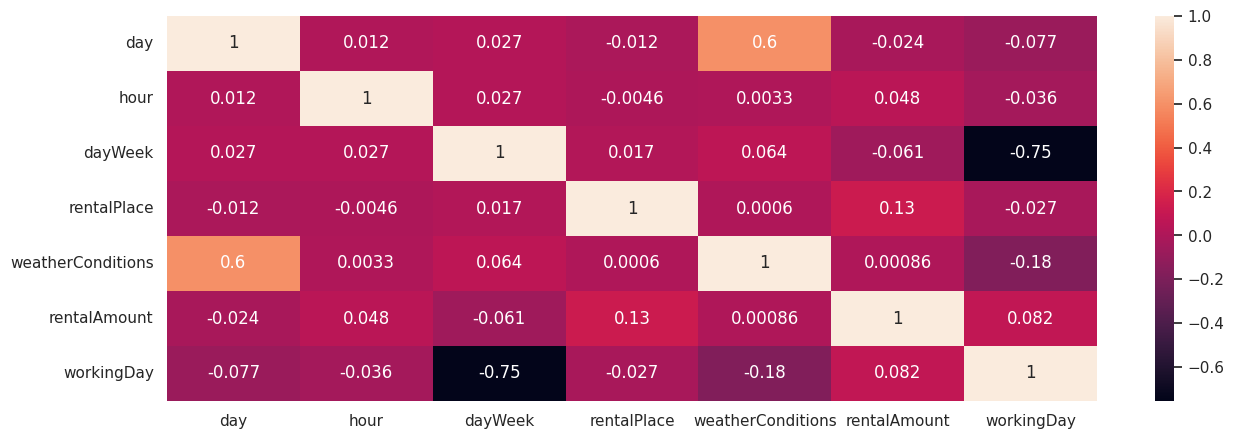

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 5)) #Tamaño
sns.heatmap(df_2022_02_scaled.corr(), square=False, annot=True)

## Comparativa por pares de Variables (sns.pairplot)

In [ ]:
sns.pairplot(df_reduced, hue='rentalPlace') # Con el parámetro hue indicamos la variable por la que se agruparán los datos

## Con Dendogramas

El X_train se pasa escalado, si no fuera así habria que usar un código como el siguiente

from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler()

norm_cases = min_max_scaler.fit_transform(X_train)

---

Si no se ha reducido lo suficiente el dataSet, puede que Google Colab no pueda ejecutarlo por falta de RAM.

Por lo que hay que probar a ejecutarlo con diferentes reducciones del porcentaje de filas, o adicionalmente usando el método **PCA** (realizado sobre los datos reducidos)

### Preparando los datos para realizar la matriz transpuesta

In [ ]:
X_T = X_train.T

### Clustering jerárquico

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
<ipython-input-163-6318076461fa>:19: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


Distancia Media	  38.09


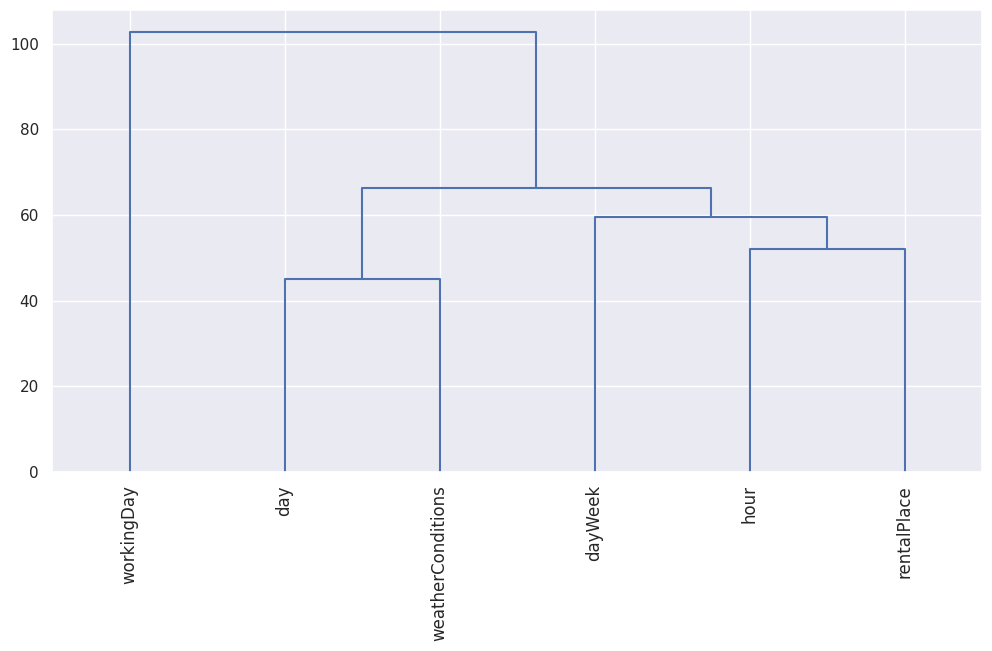

In [ ]:
# 1. Obtener la matriz de distancia entre todos los elementos
import sklearn.neighbors
import numpy as np
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean') 
D = dist.pairwise(X_T)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Construimos el dendograma	
from scipy import cluster	
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
threshold_2 = 7

threshold = 8 # Puede variar según criterio
                # de la persona que está resolviendo el problema.

# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')

# El parámetro color_threshold es el color de los grupos. Este parámetro le sirve para situar la linea de corte de grupos en el dendograma. 
# Por debajo de esta distancia crea grupos con un color distinto cada uno, salvo que estén aislados.
# Por defecto, si no se pasa ningún valor, toma 0.7 * Altura_maxima.

#cluster.hierarchy.dendrogram(clusters, color_threshold=threshold)
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=X_train.columns.to_list(), leaf_rotation=90)
plt.show()

### Conclusiones

Podemos ver diferentes grupos y subgrupos que tienen correlación entre ellos.

Con esta herramienta visual podríamos agrupar cada subgrupo en un único grupo para quedarnos con menos columnas y así tener una característica representativa para cada grupo. Algo parecido a lo que realiza el **Análisis de componentes principales (PCA)**

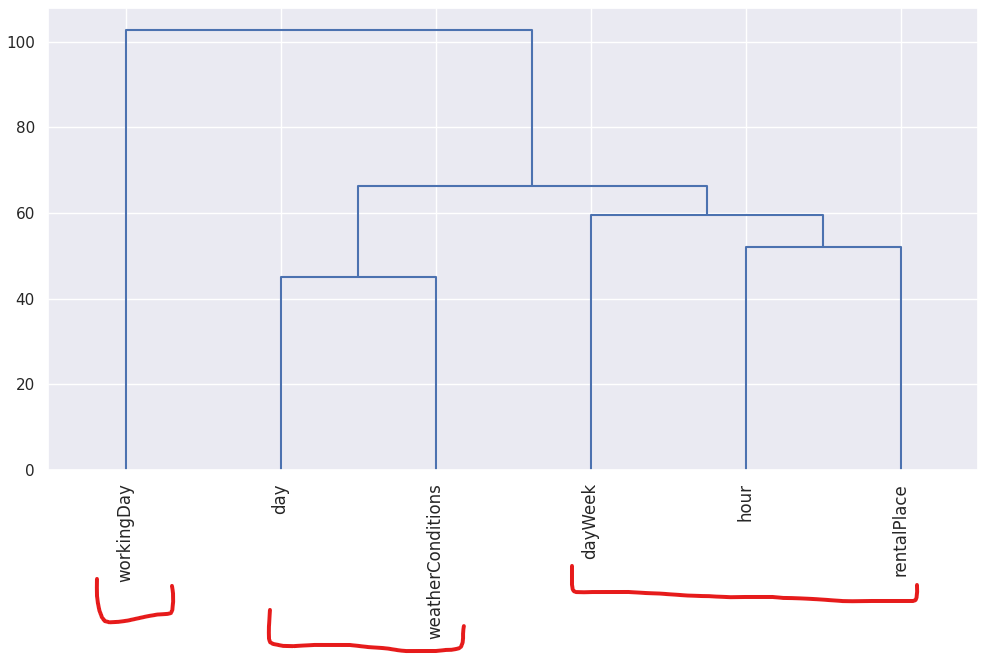

# 7. Modelo KNN con GridSearh

**Concluimos que este no es un buen modelo para este problema.**

El MAE parecía bueno, pero el MAPE y el R^2 indica todo lo contrario.

Algo que podemos comprobar gracias a las gráficas que dan resultados muy malos.

## Buscando todos los mejores **hiperparámetros** con GridSearch

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40, 50],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsRegressor()
cv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print('Best params:', best_params)
print('MAE:', mae)


Best params: {'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}
MAE: 1.2623475170492748


Best params: {'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

MAE: 1.2623475170492748

## **Entrenamos y evaluamos** el modelo con los hiperparámetros calculados con **GridSearh**

In [ ]:
best_params = {'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

In [ ]:
# Crear el modelo de KNN con los mejores hiperparámetros encontrados
knnGrid = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'],
                                 p=best_params['p'], leaf_size=best_params['leaf_size'],
                                 algorithm=best_params['algorithm'])#, metric='cosine'

# Entrenar el modelo con los datos de entrenamiento
knnGrid.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred_knnGrid = knnGrid.predict(X_test)

# Calcular la métrica de evaluación (MAE)
mae = mean_absolute_error(y_test, y_pred_knnGrid)

# Imprimir el resultado
print("MAE con los mejores hiperparámetros de KNN: ", mae)

MAE con los mejores hiperparámetros de KNN:  1.2526942656805302


## Evaluación

### Febrero 2022

In [ ]:
# Obtener las predicciones del modelo
predictions = knnGrid.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

# Imprimir las métricas
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("MAPE:", mape)

MAE: 1.2526942656805302
MSE: 2.6262249146294203
RMSE: 1.6205631473748316
R^2: 0.039389313875574206
MAPE: 0.7257037965449742


### 2022

In [ ]:
# Paso 4: Realiza las predicciones
predictions_2022 = knnGrid.predict(X_test_2022)  # Utiliza el modelo KNN entrenado

# Paso 5: Evalúa el rendimiento del modelo
mae_2022 = mean_absolute_error(y_test_2022, predictions_2022)
mse_2022 = mean_squared_error(y_test_2022, predictions_2022)
rmse_2022 = np.sqrt(mse_2022)
r2_2022 = r2_score(y_test_2022, predictions_2022)
mape_2022 = mean_absolute_percentage_error(y_test_2022, predictions_2022)

# Imprime las métricas de evaluación
print("MAE:", mae_2022)
print("MSE:", mse_2022)
print("RMSE:", rmse_2022)
print("R^2:", r2_2022)
print("MAPE:", mape_2022)

MAE: 1.1828713997615052
MSE: 2.1717575070589463
RMSE: 1.4736884022950532
R^2: -0.038130306640333345
MAPE: 0.7960564841049406


## **Visualizamos** cómo ha quedado nuestra predicción con la realidad

In [ ]:
value_counts = y_test.value_counts()
print(value_counts)

1     1474
2      855
3      549
4      316
5      191
6      100
7       55
8       28
10      12
9        9
11       1
Name: rentalAmount, dtype: int64


In [ ]:
# Redondea las predicciones
predictions_int = np.round(predictions).astype(int)
# Convierte el array en una Serie de pandas
series = pd.Series(predictions_int)
predictions_counts = series.value_counts()

predictions_counts

2    2207
3    1211
4     135
1      37
dtype: int64

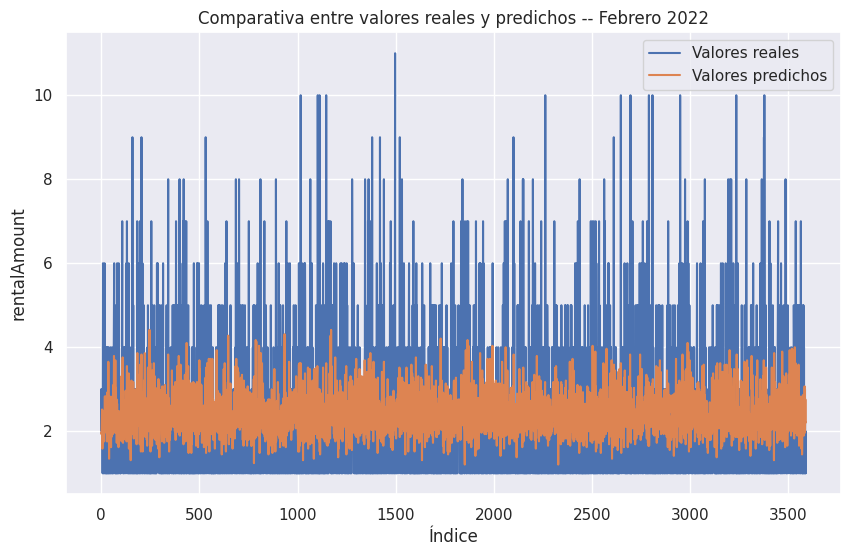

In [ ]:
# Comparativa entre los valores reales y los valores predichos Febrero 2022
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores reales')
plt.plot(predictions, label='Valores predichos')
plt.xlabel('Índice')
plt.ylabel('rentalAmount')
plt.title('Comparativa entre valores reales y predichos -- Febrero 2022')
plt.legend()
plt.show()

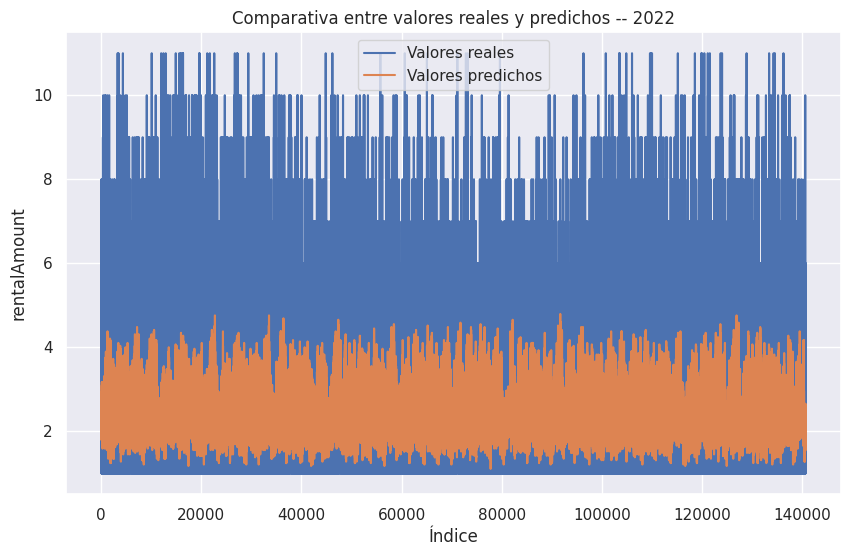

In [ ]:
# Comparativa entre los valores reales y los valores predichos 2022
plt.figure(figsize=(10, 6))
plt.plot(y_test_2022, label='Valores reales')
plt.plot(predictions_2022, label='Valores predichos')
plt.xlabel('Índice')
plt.ylabel('rentalAmount')
plt.title('Comparativa entre valores reales y predichos -- 2022')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Dispersión Febrero 2022')

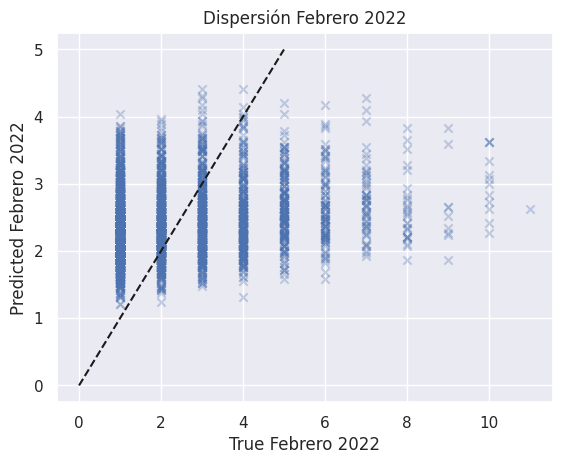

In [ ]:
plt.scatter(y_test, y_pred_knnGrid , alpha = 0.3, marker = 'x')
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True Febrero 2022")
plt.ylabel("Predicted Febrero 2022")
plt.title('Dispersión Febrero 2022')

Text(0.5, 1.0, 'Dispersión 2022')

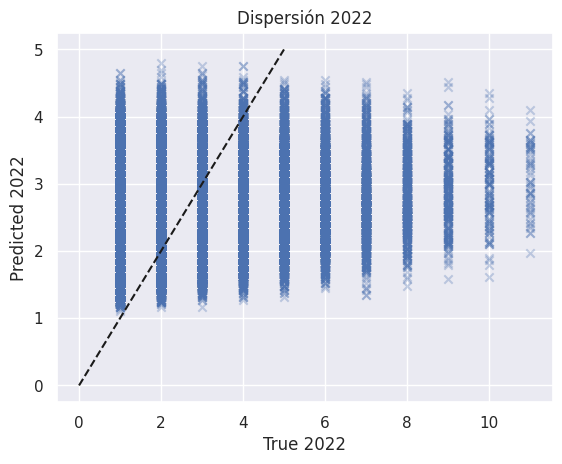

In [ ]:
plt.scatter(y_test_2022, predictions_2022 , alpha = 0.3, marker = 'x')
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True 2022")
plt.ylabel("Predicted 2022")
plt.title('Dispersión 2022')

In [ ]:
import pandas as pd

# Crear un DataFrame con los datos reales y predichos
comparativa = pd.DataFrame({'RentalAmount_Real': y_test_2022,
                            'RentalAmount_Predicho': predictions_2022})
comparativa.to_csv('comparativa.csv', index=False)

# 8. Librería Lazy Predict

Haciendo una comparativa con las estimaciones de los modelos, podemos ver como "LGBMRegressor" es el que mejores resultados da, además de tener un coste en tiempo bastante reducido.

Adjusted R-Squared - R-Squared - RMSE - Time Taken
* --- 0.28 ------------------ 0.28 ------- 1.42 -------- 0.14

Podemos ver como tenemos 28% de precisión y una desviación estándar de 1.42(cuanto más bajo mejor).

Las predicciones no son muy buenas, pero ya es mejor que la predicción con los datos de todo el año. Se aplicará la búsqueda de hiperparámetros para ajustar el modelo y obtener mejores resultados.

## Install & import

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

## Reduciendo la lista de modelos

He eliminado los modelos "QuantileRegressor" y "GaussianProcessRegressor", debido a su gran coste de cómputo y memoria.

In [ ]:
lazypredict.Supervised.REGRESSORS

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sklearn.linear_model._huber.HuberRegressor),
 ('KNeighborsRegressor', sklearn.neighbors._re

In [ ]:
# Descartados los modelos QuantileRegressor y GaussianProcessRegressor (tardaban demasiado y no daban buenos resultadso)
lazypredict.Supervised.REGRESSORS = [(name, model) for name, model in lazypredict.Supervised.REGRESSORS if name not in ['QuantileRegressor', 'GaussianProcessRegressor']]

## Usando Lazy Predict para encontrar los mejores modelos de entrenamiento

In [ ]:
# Instancia de LazyRegressor y entrenar los modelos con tus datos de entrenamiento
lazy_model = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = lazy_model.fit(X_train, X_test, y_train, y_test)

# Evaluar la precisión de cada modelo con los datos de prueba
print(models)

100%|██████████| 40/40 [01:07<00:00,  1.68s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.28       0.28  1.42        0.14
HistGradientBoostingRegressor                0.28       0.28  1.42       10.08
XGBRegressor                                 0.24       0.24  1.46        0.57
GradientBoostingRegressor                    0.22       0.22  1.47        1.38
RandomForestRegressor                        0.17       0.17  1.52        1.90
ExtraTreesRegressor                          0.11       0.11  1.58        2.30
BaggingRegressor                             0.10       0.10  1.59        0.20
MLPRegressor                                 0.07       0.07  1.62       18.11
OrthogonalMatchingPursuitCV                  0.02       0.03  1.65        0.03
LassoLarsIC                                  0.02       0.03  1.65        0.06
ElasticNetCV                                 0.02   

## Resultados

```
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.28       0.28  1.42        0.14
HistGradientBoostingRegressor                0.28       0.28  1.42       10.08
XGBRegressor                                 0.24       0.24  1.46        0.57
GradientBoostingRegressor                    0.22       0.22  1.47        1.38
RandomForestRegressor                        0.17       0.17  1.52        1.90
ExtraTreesRegressor                          0.11       0.11  1.58        2.30
BaggingRegressor                             0.10       0.10  1.59        0.20
MLPRegressor                                 0.07       0.07  1.62       18.11
OrthogonalMatchingPursuitCV                  0.02       0.03  1.65        0.03
LassoLarsIC                                  0.02       0.03  1.65        0.06
ElasticNetCV                                 0.02       0.03  1.65        0.21
LassoCV                                      0.02       0.03  1.65        0.34
BayesianRidge                                0.02       0.03  1.65        0.03
RidgeCV                                      0.02       0.03  1.65        0.03
Ridge                                        0.02       0.03  1.65        0.02
TransformedTargetRegressor                   0.02       0.03  1.65        0.02
LinearRegression                             0.02       0.03  1.65        0.04
LassoLarsCV                                  0.02       0.03  1.65        0.08
LarsCV                                       0.02       0.03  1.65        0.11
Lars                                         0.02       0.03  1.65        0.06
SGDRegressor                                 0.02       0.02  1.65        0.06
PoissonRegressor                             0.02       0.02  1.65        0.14
GammaRegressor                               0.02       0.02  1.66        0.20
TweedieRegressor                             0.02       0.02  1.66        0.10
NuSVR                                        0.02       0.02  1.66        4.23
OrthogonalMatchingPursuit                    0.02       0.02  1.66        0.02
SVR                                          0.00       0.00  1.67        6.29
DummyRegressor                              -0.00      -0.00  1.67        0.01
ElasticNet                                  -0.00      -0.00  1.67        0.03
Lasso                                       -0.00      -0.00  1.67        0.05
LassoLars                                   -0.00      -0.00  1.67        0.06
HuberRegressor                              -0.02      -0.01  1.69        0.13
LinearSVR                                   -0.04      -0.04  1.71        0.10
AdaBoostRegressor                           -0.06      -0.05  1.72        0.15
KNeighborsRegressor                         -0.11      -0.11  1.76        0.14
RANSACRegressor                             -0.33      -0.32  1.93        0.20
DecisionTreeRegressor                       -0.47      -0.47  2.03        0.06
ExtraTreeRegressor                          -0.50      -0.50  2.05        0.06
PassiveAggressiveRegressor                  -0.57      -0.57  2.10        0.03
KernelRidge                                 -1.95      -1.94  2.87       19.22
```

# 9. Modelo de LGBMRegressor (árboles de decisión)

LGBMRegressor es un modelo de regresión basado en el algoritmo de Gradient Boosting Machine (GBM) llamado LightGBM.
* Utiliza árboles de decisión como estimadores base.
* Optimizado para manejar cantidades muy grandes de filas y columnas. Hace uso de técnicas de compresión para minimizar la memoria necesaria durante el entrenamiento y la predicción.
* Utiliza el algoritmo de gradient boosting para mejorar gradualmente el rendimiento y ajustar los errores de predicción en cada iteración.
* Tiene una gran variedad de parámetros quese pueden ajustar para mejorar el modelo.
* Incluye opciones para la regularización y el control de la complejidad del modelo. Como la reducción de la tasa de aprendizaje, la limitación de la profundidad de los árboles y la reducción de la cantidad de características utilizadas.


In [ ]:
from lightgbm import LGBMRegressor

## Modelo básico

In [ ]:
model_LGBM = LGBMRegressor()
model_LGBM.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
y_pred_LGBM = model_LGBM.predict(X_test)

In [ ]:
# Calcular las métricas de evaluación
mae_LGBM = mean_absolute_error(y_test, y_pred_LGBM)
mse_LGBM = mean_squared_error(y_test, y_pred_LGBM)
rmse_LGBM = np.sqrt(mse_LGBM)
r2_LGBM = r2_score(y_test, y_pred_LGBM)
mape_LGBM = mean_absolute_percentage_error(y_test, y_pred_LGBM)

# Imprimir las métricas
print("MAE:", mae_LGBM)
print("MSE:", mse_LGBM)
print("RMSE:", rmse_LGBM)
print("R^2:", r2_LGBM)
print("MAPE:", mape_LGBM)

MAE: 1.0665312957846131
MSE: 2.0050762845978602
RMSE: 1.4160071626223718
R^2: 0.2839019024005297
MAPE: 0.5946805333859216


In [ ]:
comparison_LGBM = pd.DataFrame({"Real": y_test, "Predicted": y_pred_LGBM})
print(comparison_LGBM)

      Real  Predicted
0        2       1.86
1        3       2.95
2        1       1.27
3        3       2.34
4        1       2.10
...    ...        ...
3585     1       2.25
3586     1       2.45
3587     2       1.20
3588     3       2.42
3589     2       2.57

[3590 rows x 2 columns]


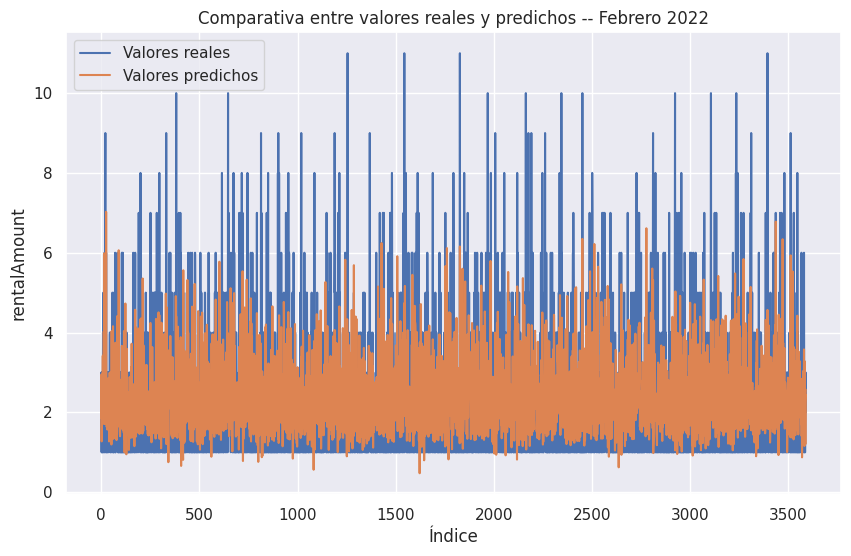

In [ ]:
# Comparativa entre los valores reales y los valores predichos Febrero 2022
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred_LGBM, label='Valores predichos')
plt.xlabel('Índice')
plt.ylabel('rentalAmount')
plt.title('Comparativa entre valores reales y predichos -- Febrero 2022')
plt.legend()
plt.show()

## Modelo con búsqueda de hiperparámetros

### Hiperparámetros (utilidad)

* boosting_type: Tipo de boosting a utilizar. Puede ser:
  * 'gbdt' (Gradient Boosting Decision Tree)
  * 'dart' (Dropouts meet Multiple Additive Regression Trees)
  * 'rf' (Random Forest)

* num_leaves: Número máximo de nodos en los árboles base del modelo.

* max_depth: Profundidad máxima de los árboles base. Un valor menor o igual a 0 indica que no hay límite.

* learning_rate: Tasa de aprendizaje del boosting. Permite controlar la contribución de cada árbol en el modelo final.

* n_estimators: Número de árboles a entrenar en el boosting.

* subsample: Proporción de submuestreo de instancias durante el entrenamiento.

* objective: Especifica la tarea de aprendizaje y el objetivo de aprendizaje correspondiente. Puede ser 'regression' para LGBMRegressor, 'binary' o 'multiclass' para LGBMClassifier, o 'lambdarank' para LGBMRanker. También se puede utilizar una función de objetivo personalizada.

* random_state: Semilla para la generación de números aleatorios.

* n_jobs: Número de hilos paralelos para utilizar durante el entrenamiento. Un valor negativo significa utilizar todos los hilos disponibles.

* importance_type: Tipo de importancia de características a calcular. Puede ser:
  * 'split' para el número de veces que se utiliza la característica en el modelo
  * 'gain' para las ganancias totales de las divisiones que utilizan la característica.

### Procedimiento

In [ ]:
# Define los hiperparámetros a ajustar
param_grid_LGBM = {
    'num_leaves': [20, 40, 60, 80, 100],
    'learning_rate': [0.1, 0.05, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, -1],
    'boosting_type': ['gbdt', 'dart','rf'],
    'importance_type': ['split', 'gain']
}

In [ ]:
# Crea el modelo LGBMRegressor
model_LGBM_Grid = LGBMRegressor(objective='regression', n_jobs=-1)

# Realiza la búsqueda de hiperparámetros
grid_search_LGBM = GridSearchCV(model_LGBM_Grid, param_grid_LGBM, scoring="neg_root_mean_squared_error", cv=5)
grid_search_LGBM.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(objective='regression'),
             param_grid={'boosting_type': ['gbdt', 'dart', 'rf'],
                         'importance_type': ['split', 'gain'],
                         'learning_rate': [0.1, 0.05, 0.01, 0.001],
                         'max_depth': [3, 5, -1],
                         'n_estimators': [100, 200, 300, 400],
                         'num_leaves': [20, 40, 60, 80, 100]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Obtiene el mejor modelo y sus hiperparámetros
best_model_LGBM_Grid = grid_search_LGBM.best_estimator_
best_params_LGBM_Grid = grid_search_LGBM.best_params_
print("Mejores estimadores:", best_model_LGBM_Grid)
print("Mejores hiperparámetros:", best_params_LGBM_Grid)

Mejores estimadores: LGBMRegressor(learning_rate=0.05, num_leaves=60, objective='regression')
Mejores hiperparámetros: {'boosting_type': 'gbdt', 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 60}


Mejores estimadores: LGBMRegressor(learning_rate=0.05, num_leaves=60, objective='regression')

Mejores hiperparámetros: {'boosting_type': 'gbdt', 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 60}

In [ ]:
best_params_LGBM_Grid =  {'boosting_type': 'gbdt', 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 60}

In [ ]:
# Entrena el mejor modelo con los datos de entrenamiento
best_model_LGBM_Grid = LGBMRegressor(**best_params_LGBM_Grid)
best_model_LGBM_Grid.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, num_leaves=60)

### Evaluación

In [ ]:
# Predicciones Febrero 2022
y_pred_LGBM_Grid = best_model_LGBM_Grid.predict(X_test)

# Calcular las métricas de evaluación
mae_LGBM_Grid = mean_absolute_error(y_test, y_pred_LGBM_Grid)
mse_LGBM_Grid = mean_squared_error(y_test, y_pred_LGBM_Grid)
rmse_LGBM_Grid = np.sqrt(mse_LGBM_Grid)
r2_LGBM_Grid = r2_score(y_test, y_pred_LGBM_Grid)
mape_LGBM_Grid = mean_absolute_percentage_error(y_test, y_pred_LGBM_Grid)

# Imprimir las métricas
print("MAE:", mae_LGBM_Grid)
print("MSE:", mse_LGBM_Grid)
print("RMSE:", rmse_LGBM_Grid)
print("R^2:", r2_LGBM_Grid)
print("MAPE:", mape_LGBM_Grid)

MAE: 1.0613008844020366
MSE: 2.044480673246611
RMSE: 1.4298533747369382
R^2: 0.29129413726120323
MAPE: 0.5816288257028238


In [ ]:
# Predicciones Todo 2022
y_pred_LGBM_Grid_2022 = best_model_LGBM_Grid.predict(X_test_2022)

# Calcular las métricas de evaluación
mae_LGBM_Grid_2022 = mean_absolute_error(y_test_2022, y_pred_LGBM_Grid_2022)
mse_LGBM_Grid_2022 = mean_squared_error(y_test_2022, y_pred_LGBM_Grid_2022)
rmse_LGBM_Grid_2022 = np.sqrt(mse_LGBM_Grid_2022)
r2_LGBM_Grid_2022 = r2_score(y_test_2022, y_pred_LGBM_Grid_2022)
mape_LGBM_Grid_2022 = mean_absolute_percentage_error(y_test_2022, y_pred_LGBM_Grid_2022)

# Imprimir las métricas
print("MAE:", mae_LGBM_Grid_2022)
print("MSE:", mse_LGBM_Grid_2022)
print("RMSE:", rmse_LGBM_Grid_2022)
print("R^2:", r2_LGBM_Grid_2022)
print("MAPE:", mape_LGBM_Grid_2022)

MAE: 1.0291664422255105
MSE: 1.7663361670922537
RMSE: 1.3290358035403913
R^2: 0.1556667349769535
MAPE: 0.6675508581145777


### **Visualizamos** cómo ha quedado nuestra predicción con la realidad

In [ ]:
# Redondear las predicciones
y_pred_LGBM_Grid_round = np.round(y_pred_LGBM_Grid).astype(int)
y_pred_LGBM_Grid_2022_round = np.round(y_pred_LGBM_Grid_2022).astype(int)

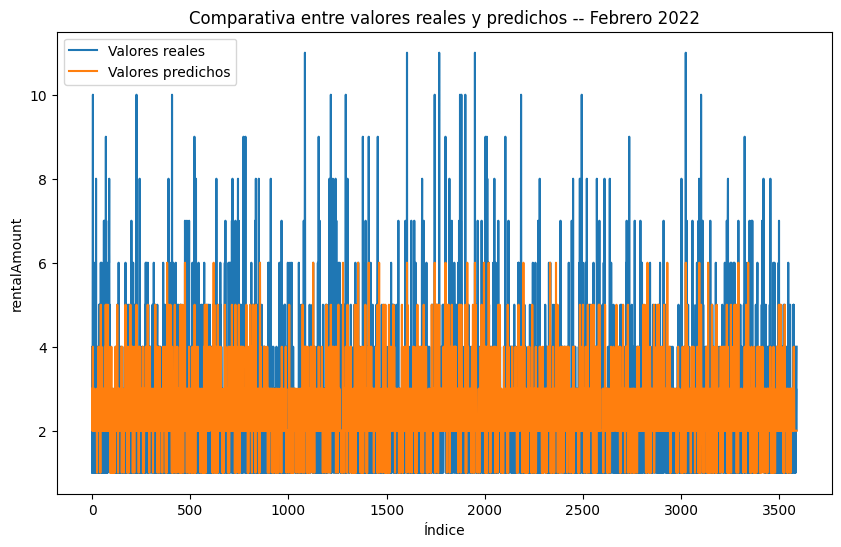

In [ ]:
# Comparativa entre los valores reales y los valores predichos Febrero 2022
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred_LGBM_Grid_round, label='Valores predichos')
plt.xlabel('Índice')
plt.ylabel('rentalAmount')
plt.title('Comparativa entre valores reales y predichos -- Febrero 2022')
plt.legend()
plt.show()

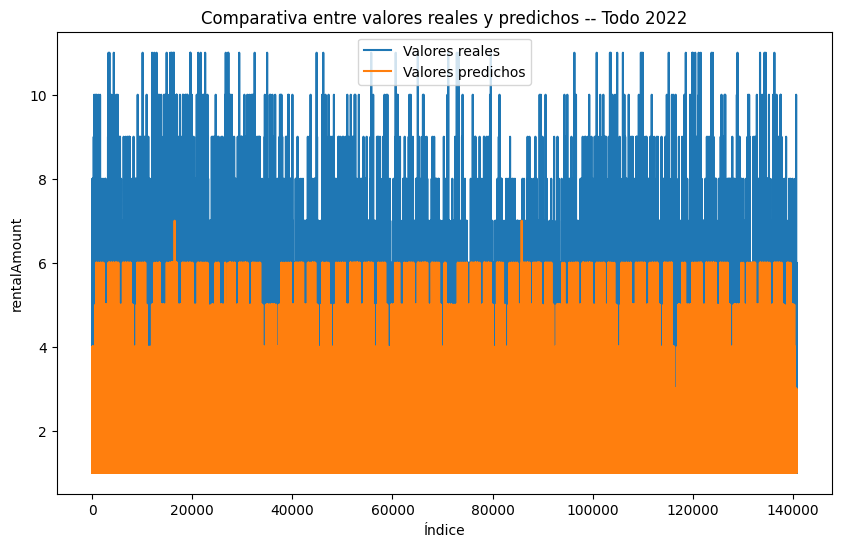

In [ ]:
# Comparativa entre los valores reales y los valores predichos Todo 2022
plt.figure(figsize=(10, 6))
plt.plot(y_test_2022, label='Valores reales')
plt.plot(y_pred_LGBM_Grid_2022_round, label='Valores predichos')
plt.xlabel('Índice')
plt.ylabel('rentalAmount')
plt.title('Comparativa entre valores reales y predichos -- Todo 2022')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Dispersión Febrero 2022')

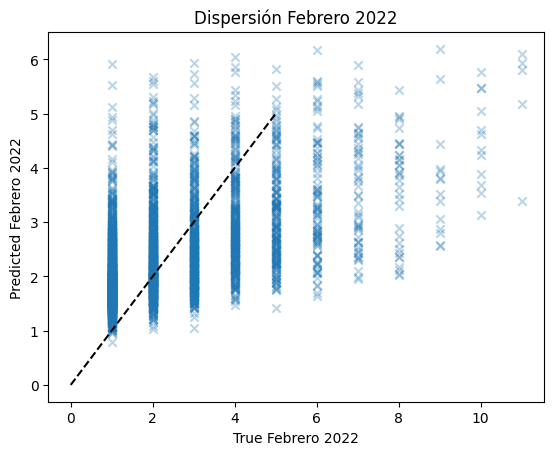

In [ ]:
plt.scatter(y_test, y_pred_LGBM_Grid , alpha = 0.3, marker = 'x')
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True Febrero 2022")
plt.ylabel("Predicted Febrero 2022")
plt.title('Dispersión Febrero 2022')

Text(0.5, 1.0, 'Dispersión Todo 2022')

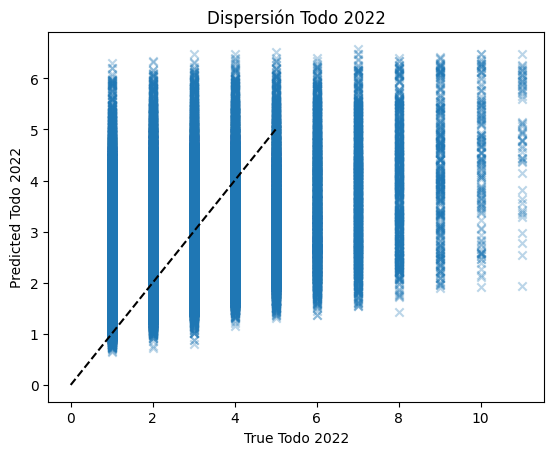

In [ ]:
plt.scatter(y_test_2022, y_pred_LGBM_Grid_2022 , alpha = 0.3, marker = 'x')
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True Todo 2022")
plt.ylabel("Predicted Todo 2022")
plt.title('Dispersión Todo 2022')

In [ ]:
comparison_LGBM = pd.DataFrame({"Real": y_test, "Predicted": y_pred_LGBM_Grid_round})
print(comparison_LGBM)

      Real  Predicted
0        1          3
1        4          2
2        1          2
3        5          4
4       10          4
...    ...        ...
3585     2          2
3586     3          2
3587     2          2
3588     3          2
3589     4          2

[3590 rows x 2 columns]


In [ ]:
comparison_LGBM = pd.DataFrame({"Real": y_test_2022, "Predicted": y_pred_LGBM_Grid_2022_round})
print(comparison_LGBM)

        Real  Predicted
0          1          1
1          1          2
2          1          2
3          1          2
4          1          1
...      ...        ...
140734     1          2
140735     2          2
140736     6          2
140737     2          2
140738     1          2

[140739 rows x 2 columns]


# 10. Probando el modelo

## DataFrame 2022

In [ ]:
df_2022_scaled

,day,hour,dayWeek,rentalPlace,weatherConditions,rentalAmount,workingDay
0,0.00,0.00,0.83,0.11,0.12,1,0
1,0.00,0.00,0.83,0.76,0.12,1,0
2,0.00,0.00,0.83,0.82,0.12,1,0
3,0.00,0.06,0.83,0.04,0.12,1,0
4,0.00,0.06,0.83,0.15,0.12,1,0
...,...,...,...,...,...,...,...
140794,1.00,1.00,0.83,0.62,0.12,1,0
140795,1.00,1.00,0.83,0.82,0.12,2,0
140796,1.00,1.00,0.83,0.71,0.12,6,0
140797,1.00,1.00,0.83,0.89,0.12,2,0


In [ ]:
df_2022_scaled['dayWeek'].unique()

array([0.83333333, 1.        , 0.        , 0.16666667, 0.33333333,
       0.5       , 0.66666667])

## Predicciones

In [ ]:
x_in = np.asarray([1, 1, 0.83, 0.71, 0.12, 0]).reshape(1,-1)

predicts_In = best_model_LGBM_Grid.predict(x_in)

pred = np.round(predicts_In).astype(int)
print (f'Cantidad de alquileres: {pred[0]}')

Cantidad de alquileres: 2


# 11. Exportando el modelo para la API

In [ ]:
pkl_filename = "API_Siticleta.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model_LGBM_Grid, file)

In [ ]:
# Guardar el modelo y el escalador
joblib.dump(best_model_LGBM_Grid, 'API_Siticleta.pkl')
joblib.dump(scaler, 'Escalador.pkl')

MinMaxScaler()